In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
from scipy import stats

import json
from datetime import timedelta, date, datetime
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
path = os.getcwd() + '/mfp-diaries.tsv'
data = pd.read_csv(path, sep='\t')
data

,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"": [{""name"": ""Calories"", ""value"": ""412""}, {""name"": ""Carbs"", ""value"": ""29""}, {""name"": ""Fat"", ""value"": ""24""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""258""}, {""name"": ""Sugar"", ""value"": ""29""}], ""name"": ""my - McDonalds Espresso Pronto\u00ae Flat White, 2 TALL""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""176""}, {""name"": ""Carbs"", ""value"": ""33""}, {""name"": ""Fat"", ""value"": ""1""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""195""}, {""name"": ""Sugar"", ""value"": ""0""}], ""name"": ""Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""342""}, {""name"": ""Carbs"", ""value"": ""34""}, {""name"": ""Fat"", ""value"": ""12""}, {""name"": ""Protein"", ""value"": ""24""}, {""name"": ""Sodium"", ""value"": ""402""}, {""name"": ""Sugar"", ""value"": ""34""}], ""name"": ""Pauls - Smarter White Milk, 600 ml""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""22""}, {""name"": ""Fat"", ""value"": ""7""}, {""name"": ""Protein"", ""value"": ""21""}, {""name"": ""Sodium"", ""value"": ""310""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Quest Bar - Cookies and Cream, 1 bar""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""180""}, {""name"": ""Carbs"", ""value"": ""46""}, {""name"": ""Fat"", ""value"": ""0""}, {""name"": ""Protein"", ""value"": ""0""}, {""name"": ""Sodium"", ""value"": ""100""}, {""name"": ""Sugar"", ""value"": ""22""}], ""name"": ""Gu Sports - Chomps, 8 pieces""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""170""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""260""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest Bar - Banana Nut Muffin Natural Protein Bar, 60 g""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""160""}, {""name"": ""Carbs"", ""value"": ""25""}, {""name"": ""Fat"", ""value"": ""5""}, {""name"": ""Protein"", ""value"": ""20""}, {""name"": ""Sodium"", ""value"": ""240""}, {""name"": ""Sugar"", ""value"": ""2""}], ""name"": ""Quest - Protein Bar Chocolate Peanut Butter, 1 bar (60 g)""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""686""}, {""name"": ""Carbs"", ""value"": ""59""}, {""name"": ""Fat"", ""value"": ""31""}, {""name"": ""Protein"", ""value"": ""40""}, {""name"": ""Sodium"", ""value"": ""1,105""}, {""name"": ""Sugar"", ""value"": ""9""}], ""name"": ""Grilld - Simply Grilled (Real), 1.25 burger""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""252""}, {""name"": ""Carbs"", ""value"": ""27""}, {""name"": ""Fat"", ""value"": ""14""}, {""name"": ""Protein"", ""value"": ""5""}, {""name"": ""Sodium"", ""value"": ""352""}, {""name"": ""Sugar"", ""value"": ""1""}], ""name"": ""Grilld - Snack Chips, 1 snack size""}, {""nutritions"": [{""name"": ""Calories"", ""value"": ""196""}, {""name"": ""Carbs"", ""value"": ""15""}, {""name"": ""Fat"", ""value"": ""10""}, {""name"": ""Protein"", ""value"": ""10""}, {""name"": ""Sodium"", ""value"": ""176""}, {""name"": ""Sugar"", ""value"": ""7""}], ""name"": ""Tasti - Salted Caramel Protein Bar, 40 g""}], ""sequence"": 1}]","{""total"": [{""name"": ""Calories"", ""value"": 2924}, {""name"": ""Carbs"", ""value"": 340}, {""name"": ""Fat"", ""value"": 114}, {""name"": ""Protein"", ""value"": 186}, {""name"": ""Sodium"", ""value"": 3658}, {""n

 მონაცემების საკმაოდ მოცულობითია 587186 სტრიქონი 4 სვეტზე. თითოეული სტიქონისთვის გვაქს აიდი, რომელიც იუზერის მაინდიფიცირებელი რიცხვია(1) , გვაქვს თარიღი(2), რომელ დღესაც იუზერმა შეიყვანა აპლიკაციაში მონაცემები. გვაქვს თვითონ მონაცემები , რომელიც იუზერმა შეიყვანა (3) . ეს მონაცემები დიქშენერების მასივი , რომელშიცი ისევ დიქშენერებია. თითოეულ ელემენტს აქვს საჭმლის სახელი, შემცველი ნუტრიენტები(ცილები , ცხიმები , ნახშირწყლები ... ).მეოთხე სვეტში არის ტოტალური რაოდენობა ნუტრიენტების და მიზანი . ანუ რა მიზანი ჰქონდა დასახული აპლიკაციას და რა რაოდენობის ნუტრიენტები მოიხმარა მომხმარებელმა . ერთი შეხედვით მონაცემები ისეთი სახითაა წარმოდგენილი , რომ სავარაუდოდ ანომალიათა და დივერგენციების რაოდენობა საკმაოდ იქნება . 
### დავიწყოთ ამ მონაცემების დაპარსვა,  და მათი გასუფთავება  .

შევხედოთ დროის რა მონაკვეთში არის მონაცემები ასახული .

In [4]:
print("First Date: ", data[data.columns[1]].unique().min())
print("Last Date: ",data[data.columns[1]].unique().max())

First Date:  2014-09-14
Last Date:  2015-04-09


შევხედოთ რამდენი განსხვავებული თარიღი გვხვდება

In [5]:
uniques = data[data.columns[1]].unique()
print("unique dates: ", len(uniques))
start = datetime.strptime('2014-09-14','%Y-%m-%d').date()
end = datetime.strptime('2015-04-09','%Y-%m-%d').date()

unique dates:  208


როგორც ვხედავთ თარიღების დუპლიკაცია არაა რადგან 2015-04-09 - 2014-09-14 = 208 დღეს
ვნახოთ როგორი სიხშირით იყენებდა ხალხი აპლიკაციას. ეს საშუალებას მოგვცემს განვსაზღვროთ როგორი დინამიკა იყო ამ დროის პერიოდის განმავლობაში.

In [6]:
user_activity = np.zeros(data[data.columns[0]].unique().max())
for i in range( int((end-start).days)+1):
    dat = start+timedelta(i)
    dat_str = dat.strftime('%Y-%m-%d')
    curr_dt = data[data[data.columns[1]]==dat_str]
    for j in range(curr_dt.shape[0]):
        user_activity[curr_dt.iloc[j,0]-1]+=1


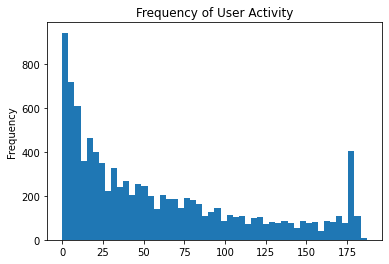

In [7]:
plt.hist(user_activity, bins=50)
plt.ylabel('Frequency')
plt.title('Frequency of User Activity')
plt.show()

როგორც ვხედავთ იუზერების აქტივობა დროის პერიოდის დასაწყისში ბევრად უფრო მეტი იყო და დროთა განმავლობაში დაიკლო ხოლო ბოლოს ისევ მოიმტა. სავარაუდოდ მსგავსი დინამიკა დამოკიდბულია აპლიკაციის გამოსვლის და მისი აქტუალურობის ასპქტთან . ამასთანავე დროის პერიოდი როდესაც ყველაზე მაღალია აქტივობა არის შემოდგომის პერიოდი. ეს მონაცემიც შეგვიძლია გამოვიყენოთ იმის გასაგებად , თუ რა დროს არის ყველაზე მეტი სარგებლის მომტანი აპლიკაციის გაპიარება . 

როგორც ვნახეთ ზევით , თითოეული საჭმელი შეიცავს გარკვეულ ნუტრიენტებს . ჩვენთვის საინტერესო გახდა რა 
ნუტრინენტებია მონაცემებში და რა რაოდენობით . სავარაუდოდ ზოგიერთი ნუტრიენტი ნაკლებად იქნება , ზოგიერთი მეტი,
რაც  მსგავსი ნუტრიენტების გადაგდების საშუალებას მოგვცემს

თითოეულ საჭმელს აქვს dishes პარამეტრი და თითოეულ dish_ში არის ნუტრიენტების მასივი . თითოეულ ნუტრიენტს აქვს სახელი და მისი შესაბამისი რაოდენობა . პრიველ ჯერზე დავთვალოთ რამდენჯერ გვხვდება თითოეული ნუტრიენტი მონაცემებში.

In [8]:
unique_nutritions = {}
for i in range(data.shape[0]):
    foods = json.loads(data.iloc[i,2])
    for j in range(len(foods)):
        dishes = foods[j]['dishes']
        
        for curr_dish in range(len(dishes)):
            nutritions = dishes[curr_dish]['nutritions']
            
            for n in range(len(nutritions)):
                prto_type = nutritions[n]['name']
                if prto_type in unique_nutritions.keys():
                    unique_nutritions[prto_type]+=1
                else:
                    unique_nutritions[prto_type] = 1
                

ჯერ ვნახოთ რამდენი სახის ნუტრიენტები გვაქვს 

In [9]:
print(unique_nutritions.keys())
print("Num of nutrient types: "+str(len(unique_nutritions.keys())))

dict_keys(['Calories', 'Carbs', 'Fat', 'Protein', 'Sodium', 'Sugar', 'Fiber', 'Potass.', 'Iron', 'Calcium', 'Sat Fat', 'Chol', 'Vit A', 'Vit C', 'Trn Fat', 'Mon Fat', 'Ply Fat'])
Num of nutrient types: 17


ჩვენი პირველი ვარაუდი იყო რომ მაქსიმუმ 5 მახასიათებელი იქნებოდა , თუმცა როგორც ვხედავთ 17 სხვადასხვა სახის ნუტრიენტი გვაქვს

In [10]:
sortedNutritions = sorted(unique_nutritions.items(), key=lambda x : x[1], reverse = True)
print(sortedNutritions)
sortedDictionary = {}
for nut in sortedNutritions:
    sortedDictionary[nut[0]] = nut[1]
print(sortedDictionary)

[('Calories', 6502736), ('Protein', 6428935), ('Carbs', 6332306), ('Fat', 6300927), ('Sodium', 4226233), ('Sugar', 3933313), ('Fiber', 2859976), ('Iron', 367846), ('Calcium', 280697), ('Potass.', 245784), ('Chol', 198545), ('Sat Fat', 190156), ('Vit C', 24166), ('Trn Fat', 16932), ('Ply Fat', 14614), ('Mon Fat', 11282), ('Vit A', 9165)]
{'Calories': 6502736, 'Protein': 6428935, 'Carbs': 6332306, 'Fat': 6300927, 'Sodium': 4226233, 'Sugar': 3933313, 'Fiber': 2859976, 'Iron': 367846, 'Calcium': 280697, 'Potass.': 245784, 'Chol': 198545, 'Sat Fat': 190156, 'Vit C': 24166, 'Trn Fat': 16932, 'Ply Fat': 14614, 'Mon Fat': 11282, 'Vit A': 9165}


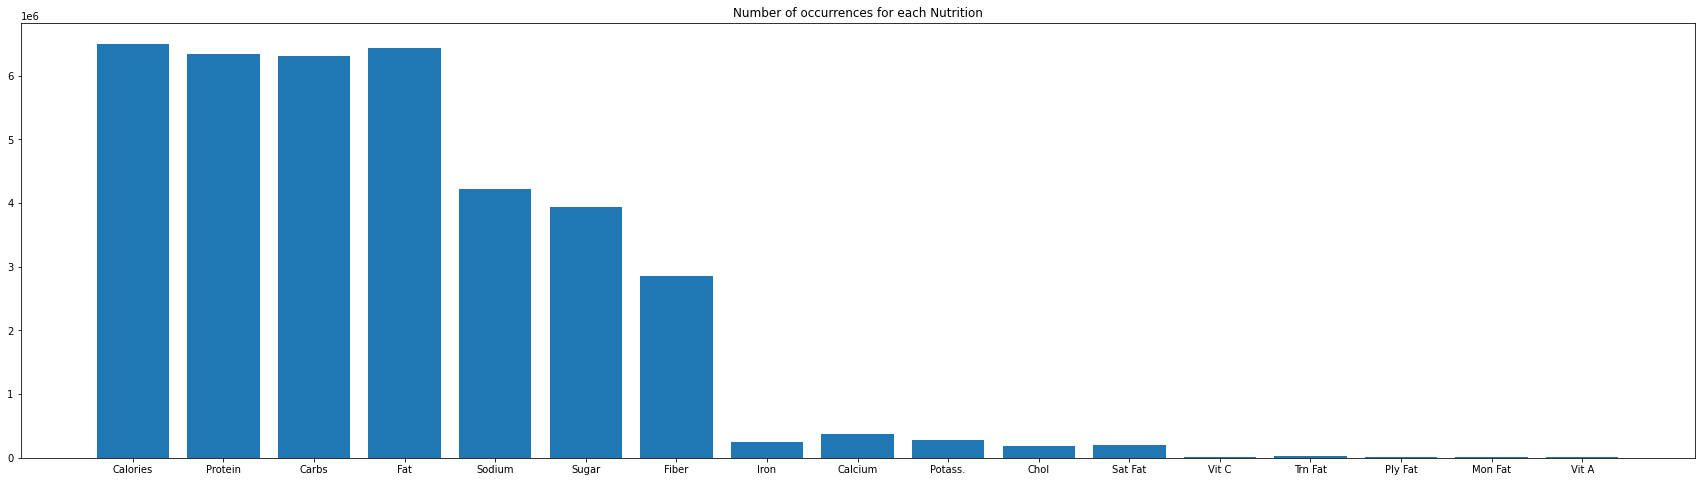

In [11]:
plt.figure(figsize=(30,8))
plt.bar(x = sortedDictionary.keys(), height = unique_nutritions.values())
plt.title('Number of occurrences for each Nutrition')
plt.show()

ნუტრიენტებში ლიდერობენ კალორიები , პროტეინები , ნახშირწყლები,ცხიმები , შაქარი , ყველაზე მცირე რაოდენობით არის Vit C, Trn Fat,Ply Fat,Mon Fat,Vit A . 
ვინაიდან მათი რაოდენობა ძალიან მცირეა , გადავწყვიტეთ საერთოდ გადაგვეყარა.


In [12]:
filteredNutritions = {}
not_needed_prots =['Vit A', 'Vit C', 'Trn Fat', 'Potass.',
                    'Mon Fat', 'Ply Fat','Iron','Calcium','Chol','Sat Fat']
for nutritionName in sortedDictionary.keys():
    if nutritionName not in not_needed_prots:
        filteredNutritions[nutritionName] = sortedDictionary[nutritionName]
print(filteredNutritions)

{'Calories': 6502736, 'Protein': 6428935, 'Carbs': 6332306, 'Fat': 6300927, 'Sodium': 4226233, 'Sugar': 3933313, 'Fiber': 2859976}


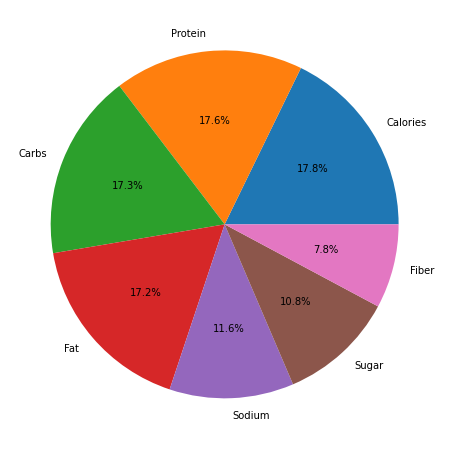

In [13]:
plt.figure(figsize=(20,8))
plt.pie(filteredNutritions.values(), labels = filteredNutritions.keys(),autopct = "%1.1f%%")
plt.show()

დავთვალოთ საჭმელების უნიკალური მახასიათებლები 2 პარამეტრად, 
1.მომხმარებელს რამდენი აქვს შეყვანილი(რამდენი ჭამა)
2.მიზანი (აპლიკაციამ რამდენი დაუნიშნა)
ვნახოთ არის თუ არა დივერგენცია მონაცემებში და ნამდვილად არის თუ არა ტოტალები ტოლი ცალკეული ნუტრიენტიების ჯამების. 


როგორც აღვნიშნეთ 5 ტიპის ნუტრიენტი გადავაგდეთ, რადგან მათი მაჩვენებლი მნიშვნელოვნად მცირე იყო დანარჩენ ნუტრიენტებთან შედარებით . შესაბამისად დათვლებს მხოლოდ prot_names_ში არსებულ ნუტრიენტებზე გავაკეთებთ.


In [45]:
prot_names = ['Calories', 'Carbs', 'Fat', 'Protein', 
         'Sodium', 'Sugar', 'Fiber']

ამ ეტაპზე ჩვენი მიზანია ვნახოთ რამდენად სწორია მონაცემები . დავთვალოთ თითოეულ სტრიქონში არსებული ნუტრიენტებისთვის ჯამები თუ ემთხვევა ტოტალების სვეტში არსებულ მნიშვნელობებს . ყოველი დაუმთხვეველი ტიპი ჩავყაროთ მასივში და ვნახოთ რა დივერგენცია ხდება .

In [15]:
total_calories = []
total_carbs = []
total_fat = []
total_protein = []
total_sodium = []
total_sugar = []
total_fiber = []


totals = [total_calories,total_carbs,total_fat,total_protein,
          total_sodium, total_sugar,total_fiber,]

In [16]:
def count_totals(tot_data):
    result = {}

    for curr_tot in tot_data:
        prot_name = curr_tot['name']
        if prot_name in not_needed_prots:
            continue
        prot_val = curr_tot['value']
        if prot_name not in result.keys():
            result[prot_name] = prot_val
        else: 
            result[prot_name] += prot_val
        
        totals[prot_names.index(prot_name)].append(prot_val)
        
    return result

ასევე ბარემ ამოვიღოთ გოლები რაც დაუწესა აპლიკაციამ მომხმარებელს 

In [17]:
goal_calories = []
goal_carbs = []
goal_fat = []
goal_protein = []
goal_sodium = []
goal_sugar = []
goal_fiber = []


goals = [goal_calories,goal_carbs,goal_fat,goal_protein,
         goal_sodium,goal_sugar,goal_fiber]

In [18]:
def fill_goals(goal_data):
    for curr_goal in goal_data:
        prot_name = curr_goal['name']
        if prot_name in not_needed_prots:
            continue
        prot_value = curr_goal['value']
        goals[prot_names.index(prot_name)].append(prot_value)

### ამათი დანიშნულებაც აღვწეროთ რომ გავერკვევით

In [19]:
divergence = []
dishes_count = []

In [20]:
def replacer(value):
    return value.replace(',', '')

In [21]:
def count_sums():
    result = {}
    
    dishes = json.loads(data.iloc[i,2])
    
    for dish in dishes:
        dish_per_day = dish['dishes']
        dishes_count.append(len(dish_per_day))
        
        for food in dish_per_day:
            nutritions = food['nutritions']
            
            for prot in nutritions:
                prot_name = prot['name']
                if prot_name in not_needed_prots:
                    continue
                prot_val = prot['value']
                if prot_name not in result.keys():
                    result[prot_name] = int(replacer(prot_val))
                else:
                    result[prot_name] += int(replacer(prot_val))
    
    return result

In [22]:
def checkForDivergence(tots, index):
    sums = count_sums()
    if tots != sums:
        divergence.append((index, sums, tots))

In [23]:
sum_check = True
gt_check = False
for i in range(data.shape[0]):
    sums = count_sums()

    main_info = json.loads(data.iloc[i,3])

    total_data = main_info['total']     
    goal_data = main_info['goal']
    fill_goals(goal_data)
    
    checkForDivergence(count_totals(total_data), i)


In [24]:

print(len(divergence))
for index in range(20):
    print(divergence[index])

918
(33612, {'Calories': 3960}, {'Calories': 1980})
(33613, {'Calories': 682}, {'Calories': 341})
(33614, {'Calories': 5030}, {'Calories': 2515})
(33615, {'Calories': 4190}, {'Calories': 2095})
(33616, {'Calories': 4462}, {'Calories': 2231})
(33617, {'Calories': 190}, {'Calories': 95})
(33618, {'Calories': 304}, {'Calories': 152})
(33619, {'Calories': 2506}, {'Calories': 1253})
(33620, {'Calories': 3400}, {'Calories': 1700})
(33621, {'Calories': 2856}, {'Calories': 1428})
(33622, {'Calories': 1394}, {'Calories': 697})
(33623, {'Calories': 3152}, {'Calories': 1576})
(33624, {'Calories': 1116}, {'Calories': 558})
(33625, {'Calories': 2432}, {'Calories': 1216})
(33626, {'Calories': 2230}, {'Calories': 1115})
(33627, {'Calories': 2580}, {'Calories': 1290})
(33628, {'Calories': 2146}, {'Calories': 1073})
(33629, {'Calories': 4048}, {'Calories': 2024})
(33630, {'Calories': 2180}, {'Calories': 1090})
(33631, {'Calories': 1192}, {'Calories': 596})


დივერგენციების სტატუსის შემოწმებისას აღმოჩნდა , რომ 918 ჩანაწერში გვხდება აცდენა ტოტალსა და ხელით აჯამულ მონაცემებს შორის . საინტერესო ფაქტია ის , რომ აცდენილი მნიშვნელობების შეფარდება ზუსტად 2_ის ტოლია. ეს ფაქტი სავარაუდოდ აპლიკაციის ბექენდის გამოა, სადაც მონაცემების გადუბლირება ხდება.  

ამასთანავე, დატის დათვალიერებისას , თვალში მოგვხვდა ზოგიერთი მონაცემის უარყოფითობა . გადავწყვიტეთ , რომ გამოვიკვლიოთ მსგავის უარყოფითი მნიშვნელობები 

In [25]:
negatives = {}
for i in range(data.shape[0]):
    dcol = json.loads(data.iloc[i,2])
    for dish in dcol:
        for food in dish['dishes']:
            for nutrients in food['nutritions']:
                if int(replacer(nutrients['value'])) <0 :
                    if food['name'] not in negatives.keys():
                        protValTupla = (nutrients['name'],int(replacer(nutrients['value'])))
                        protSet = set(protValTupla)
                        negatives[food['name']] = [1,protSet]
                    else:
                        negatives[food['name']][0] += 1
                        protValTupla = (nutrients['name'],int(replacer(nutrients['value'])))
                        negatives[food['name']][1].add(protValTupla)

In [26]:
sortedNegatives = sorted(negatives.items(), key=lambda item: -item[1][0])
for key,value in sortedNegatives:
    print(key,value)


Breastfeeding - -500 Cal Per Day, 1 day [555, {('Carbs', -10), 'Calories', ('Calories', -500), ('Protein', -1), -500, ('Fat', -6), ('Sodium', -23)}]
Generic - Breastfeeding Exclusively, 27 oz. [536, {'Calories', ('Calories', -500), -500, ('Carbs', -50), ('Protein', -31), ('Fat', -16)}]
Breastfeeding - Toddler -200 Cal, 1 day [280, {'Calories', ('Protein', -8), ('Fiber', -2), ('Carbs', -28), -200, ('Calories', -200), ('Fat', -7)}]
Breastfeeding - -300 Cal Per Day, 1 day [230, {('Protein', -10), ('Fiber', -4), 'Calories', -300, ('Fat', -10), ('Protein', -13), ('Carbs', -35), ('Calories', -300), ('Carbs', -45)}]
Generic - Breastfeeding Exclusively, 20.25 oz. [168, {'Calories', -375, ('Calories', -375), ('Fat', -12), ('Carbs', -38), ('Protein', -23)}]
Breast Feeding - Exclusive, 1 day [136, {-200, 'Calories', ('Calories', -200)}]
Ebf - Breastfeeding, 1 oz [132, {'Calories', ('Calories', -500), -500}]
Breastfeeding - -500 Calories, 1 serving [95, {('Protein', -10), 'Calories', ('Carbs', -20

In [27]:
sortedNegatives = sorted(negatives.items(), key=lambda item: -item[1][0])
negativesDict = {'Breastfeeding':0,'CUSTOM_ADJUST':0,
                 'Other':0}
for key,value in sortedNegatives:
    if 'Breastfeeding' in key or 'Generic' in key :
        negativesDict['Breastfeeding'] +=1
    elif 'CUSTOM ADJUST' in key or 'Net Carb Adjustment' in key:
        negativesDict['CUSTOM_ADJUST'] +=1    
    else:
        negativesDict['Other'] +=1
print(negativesDict)
   


{'Breastfeeding': 44, 'CUSTOM_ADJUST': 45, 'Other': 113}


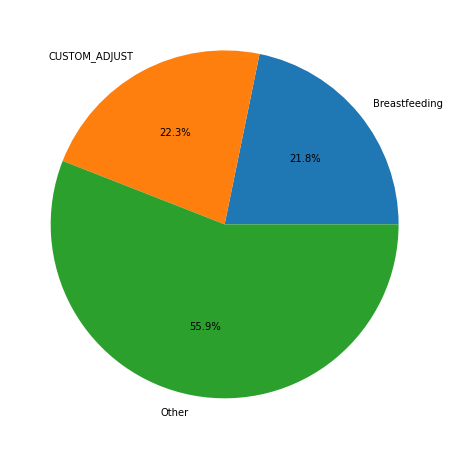

In [28]:
plt.figure(figsize=(20,8))
plt.pie(negativesDict.values(), labels = negativesDict.keys(),autopct = "%1.1f%%")
plt.show()

უარყოფითი დატის გაანალიზებისას , უპირატესობა დაიკავა BreastFeeding_მა. მიუხედავად ამ ჩარტში 22 პროცენტისა გარკვეული მომხმარებლები , BreastFeeding_ს სხვადსხვა ტიპის ქვეშ აერთიანებენ . Other ნაწილი წვრილ-წვრილი და მრავალი ტიპის საკვებია ,ამიტომაც გამოვიდა ყველაზე ბევრი . 

In [29]:
for goal in goals:
    print(len(goal))

587179
573046
569327
579865
390527
368914
242840


საბოლოოდ , არსებული მონაცემებიდან გვინდა რომ მივიღოთ, უფრო გამარტივებული და 
გასუფთავებული მონაცემები.
ვაგდებთ  ნუტრიენტებიდან 10 ცალ,ყველაზე ცოტა რაოდენობის, ნუტრიენტს.
ახალ ცხრილში გვინდა რომ მონაცემები დავალაგოთ თარიღების ჭრილში.
თითოეული მონაცემი ნუტრიენტების იქნება ტოტალური მაჩვენებელი . 
გვექნება საშუალო მაჩვენებლები და მედიანები.

In [ ]:
new_data = {}
new_data['Date'] = []
new_data['User_Activity'] = []
new_data['Food_Count'] = []

In [ ]:
new_data['total_calories'] = []
new_data['total_carbs'] = []
new_data['total_fat'] = []
new_data['total_protein'] = []
new_data['total_sodium']= []
new_data['total_sugar'] = []
new_data['total_fiber'] = []

totals_new_data = [
    new_data['total_calories'], new_data['total_carbs'], new_data['total_fat'],
    new_data['total_protein'], new_data['total_sodium'], new_data['total_sugar'],
    new_data['total_fiber']
]

new_data['total_calories_average'] = []
new_data['total_carbs_average'] = []
new_data['total_fat_average'] = []
new_data['total_protein_average'] = []
new_data['total_sodium_average']= []
new_data['total_sugar_average'] = []
new_data['total_fiber_average'] = []

total_averages_new_data = [
    new_data['total_calories_average'], new_data['total_carbs_average'],
    new_data['total_fat_average'], new_data['total_protein_average'],
    new_data['total_sodium_average'], new_data['total_sugar_average'],
    new_data['total_fiber_average']
]

In [54]:
def countTotals(tmp_data, tmp):   
    for j in range(tmp_data.shape[0]):  
        dloc = json.loads(tmp_data.iloc[j, 2])
        for dish in dcol:
            for food in dish['dishes']:
                for nutrient in food['nutritions']:
                    index = prot_names.index(nutrient['name'])
                    value = replacer(nutrient['value'])
                    tmp[index] += int(value)

In [33]:
new_data['goal_calories'] = []
new_data['goal_carbs'] = []
new_data['goal_fat'] = []
new_data['goal_protein'] = []
new_data['goal_sodium']= []
new_data['goal_sugar'] = []
new_data['goal_fiber'] = []

goals_new_data = [
    new_data['goal_calories'], new_data['goal_carbs'], new_data['goal_fat'],
    new_data['goal_protein'], new_data['goal_sodium'], new_data['goal_sugar'],
    new_data['goal_fiber']
]

new_data['goal_calories_average'] = []
new_data['goal_carbs_average'] = []
new_data['goal_fat_average'] = []
new_data['goal_protein_average'] = []
new_data['goal_sodium_average']= []
new_data['goal_sugar_average'] = []
new_data['goal_fiber_average'] = []

goal_averages_new_data = [
    new_data['goal_calories_average'], new_data['goal_carbs_average'],
    new_data['goal_fat_average'], new_data['goal_protein_average'],
    new_data['goal_sodium_average'], new_data['goal_sugar_average'],
    new_data['goal_fiber_average']
]

In [34]:
# def countGoals():
#     for j in range(data.shape[0]):


SyntaxError: unexpected EOF while parsing (<ipython-input-34-eb5b5463d927>, line 2)

In [35]:
def countFood(data):
    res = 0
    
    for j in range(data.shape[0]):
        food_entries = json.loads(data.iloc[j, 2])
        food = food_entries[0]
        res += len(food['dishes'])
    
    return res

In [55]:
time_interval = int((end-start).days)+1
for i in range(time_interval):
    date = start+timedelta(i)
    date = date.strftime('%Y-%m-%d')
    
    tmp_data = data[data[data.columns[1]] == date]
    food_count = countFood(tmp_data)
    
    tmp_totals = np.zeros(len(prot_names))
    countTotals(tmp_data, tmp_totals)
    
    for k in range(len(prot_names)):
        totals_new_data[k].append(tmp_totals[k])
    
#     countGoals(tmp_data)
    
    
    
    new_data['Date'].append(date)
    new_data['User_Activity'].append(len(tmp_data[tmp_data.columns[0]].unique()))
    new_data['Food_Count'].append(food_count)
    
    

In [56]:
p = pd.DataFrame(totals_new_data)
p


,0,1,2,3,4,5,6,7,8,9,...,406,407,408,409,410,411,412,413,414,415
0,83776.0,418880.0,417384.0,409904.0,571472.0,676192.0,770440.0,1065152.0,1751816.0,2054008.0,...,1934328.0,1684496.0,1415216.0,1110032.0,873664.0,770440.0,858704.0,525096.0,197472.0,25432.0
1,7392.0,36960.0,36828.0,36168.0,50424.0,59664.0,67980.0,93984.0,154572.0,181236.0,...,170676.0,148632.0,124872.0,97944.0,77088.0,67980.0,75768.0,46332.0,17424.0,2244.0
2,5768.0,28840.0,28737.0,28222.0,39346.0,46556.0,53045.0,73336.0,120613.0,141419.0,...,133179.0,115978.0,97438.0,76426.0,60152.0,53045.0,59122.0,36153.0,13596.0,1751.0
3,3024.0,15120.0,15066.0,14796.0,20628.0,24408.0,27810.0,38448.0,63234.0,74142.0,...,69822.0,60804.0,51084.0,40068.0,31536.0,27810.0,30996.0,18954.0,7128.0,918.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2912.0,14560.0,14508.0,14248.0,19864.0,23504.0,26780.0,37024.0,60892.0,71396.0,...,67236.0,58552.0,49192.0,38584.0,30368.0,26780.0,29848.0,18252.0,6864.0,884.0
6,616.0,3080.0,3069.0,3014.0,4202.0,4972.0,5665.0,7832.0,12881.0,15103.0,...,14223.0,12386.0,10406.0,8162.0,6424.0,5665.0,6314.0,3861.0,1452.0,187.0
